

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

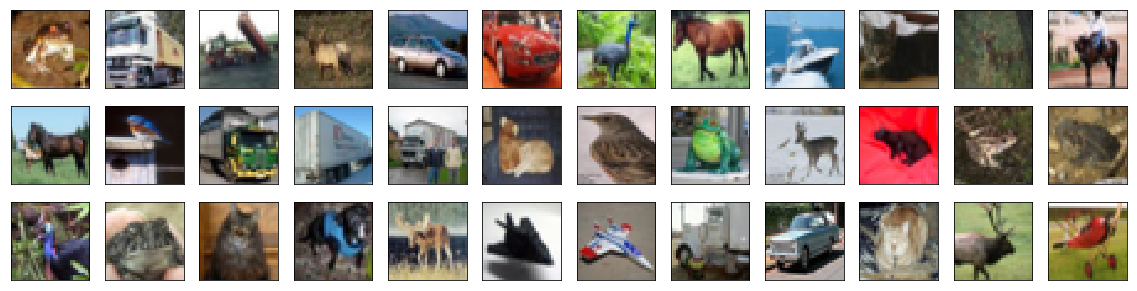

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


#per default kernel size = 2 for all layers
model = Sequential()
#model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
#                        input_shape=(32, 32, 3)))
#model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
#model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#added by me
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#added by me

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 15, 15, 64)        8256      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 7, 7, 128)         32896     
__________

### 6. Compile the Model 

In [45]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [46]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=5,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
 - 128s - loss: 1.5367 - acc: 0.4422 - val_loss: 1.2995 - val_acc: 0.5226

Epoch 00001: val_loss improved from inf to 1.29950, saving model to model.weights.best.hdf5
Epoch 2/5
 - 172s - loss: 1.1015 - acc: 0.6140 - val_loss: 1.2903 - val_acc: 0.5616

Epoch 00002: val_loss improved from 1.29950 to 1.29032, saving model to model.weights.best.hdf5
Epoch 3/5
 - 135s - loss: 0.9690 - acc: 0.6626 - val_loss: 1.0429 - val_acc: 0.6516

Epoch 00003: val_loss improved from 1.29032 to 1.04294, saving model to model.weights.best.hdf5
Epoch 4/5
 - 113s - loss: 0.9048 - acc: 0.6885 - val_loss: 1.0791 - val_acc: 0.6610

Epoch 00004: val_loss did not improve from 1.04294
Epoch 5/5
 - 124s - loss: 0.8866 - acc: 0.6995 - val_loss: 0.8320 - val_acc: 0.7218

Epoch 00005: val_loss improved from 1.04294 to 0.83203, saving model to model.weights.best.hdf5


### 8. Load the Model with the Best Validation Accuracy

In [47]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [48]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7152


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

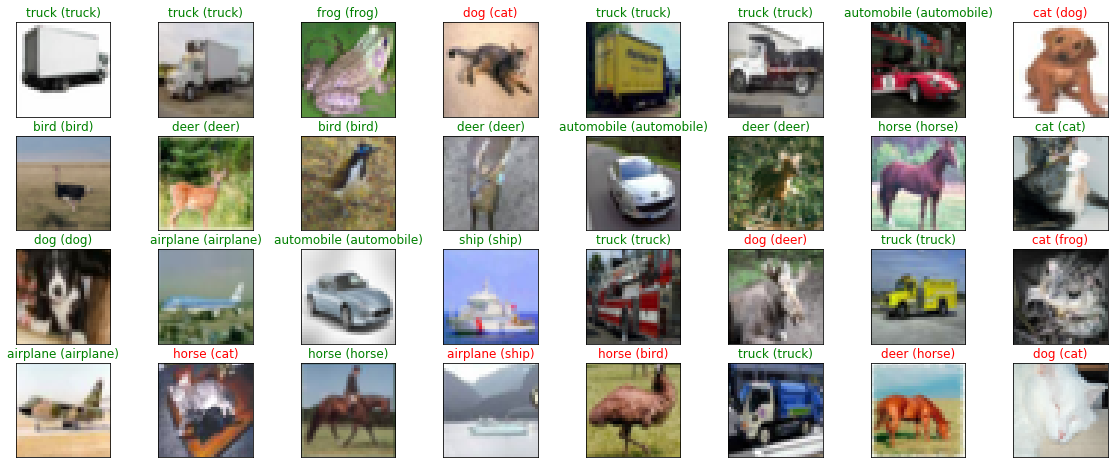

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))